In [1]:
import joblib
import numpy as np

In [2]:
better = joblib.load('files/feats_counter_train_correct_776')
worse = joblib.load('files/feats_counter_train_error_776')

FileNotFoundError: [Errno 2] No such file or directory: 'files/feats_counter_train_correct_776'

In [26]:
better.shape

(100, 31, 1, 776)

In [27]:
worse.shape

(100, 31, 1, 776)

In [28]:
inter_feats = ['Answer Length', 'Word Count', 'Average Word Length', 'Unique Word Count', 'Punctuation Density',
                  'Prompt Similarity SBert', 'Spelling Error', 'Language Error']

In [29]:
better_inter = better[:, :, 0, :8].reshape(-1, 8)
better_inter.shape

(3100, 8)

In [30]:
worse_inter = worse[:, :, 0, :8].reshape(-1, 8)
worse_inter.shape

(3100, 8)

In [31]:
mean_better = better_inter.mean(axis=0)
mean_worse = worse_inter.mean(axis=0)

diff = mean_better - mean_worse

print("Feature-wise difference (better - worse):", diff)


Feature-wise difference (better - worse): [ 0.06451613  0.1883871  -0.00796066 -0.51225806  0.03015336  0.00887107
 -0.01321445 -0.08552154]


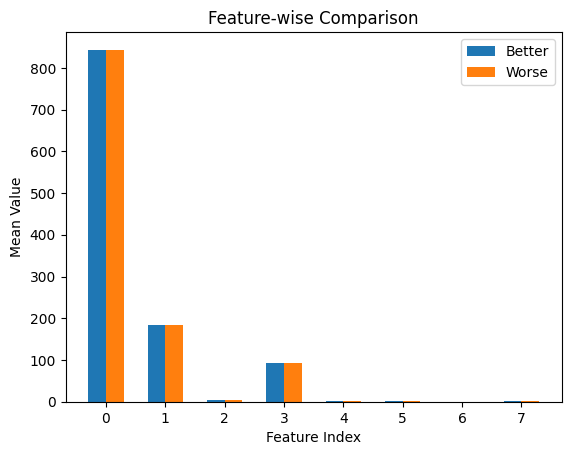

In [32]:
import matplotlib.pyplot as plt

x = np.arange(8)
plt.bar(x - 0.15, mean_better, width=0.3, label='Better')
plt.bar(x + 0.15, mean_worse, width=0.3, label='Worse')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.title('Feature-wise Comparison')
plt.legend()
plt.show()


In [35]:
import pandas as pd

# Example feature names (replace with your actual ones)
feature_names = ['Answer Length', 'Word Count', 'Average Word Length', 'Unique Word Count', 'Punctuation Density',
                  'Prompt Similarity SBert', 'Spelling Error', 'Language Error']

# Convert to DataFrames
df_better = pd.DataFrame(better_inter, columns=feature_names)
df_worse = pd.DataFrame(worse_inter, columns=feature_names)


In [36]:
mean_better = df_better.mean()
mean_worse = df_worse.mean()
diff = mean_better - mean_worse

# Combine into a comparison table
comparison_df = pd.DataFrame({
    'Better Mean': mean_better,
    'Worse Mean': mean_worse,
    'Difference (Better - Worse)': diff
})

print(comparison_df)


                         Better Mean  Worse Mean  Difference (Better - Worse)
Answer Length             843.324194  843.259677                     0.064516
Word Count                184.208387  184.020000                     0.188387
Average Word Length         3.570804    3.578764                    -0.007961
Unique Word Count          91.610968   92.123226                    -0.512258
Punctuation Density         2.228527    2.198374                     0.030153
Prompt Similarity SBert     0.611164    0.602293                     0.008871
Spelling Error              0.023187    0.036402                    -0.013214
Language Error              0.645877    0.731398                    -0.085522


In [37]:
from scipy.stats import ttest_rel

# Perform paired t-test for each feature
t_stats, p_values = ttest_rel(better_inter, worse_inter)

# Add p-values to the comparison table
comparison_df['p-value'] = p_values

# Optional: mark significant results
comparison_df['Significant (<0.05)'] = p_values < 0.05

print(comparison_df)


                         Better Mean  Worse Mean  Difference (Better - Worse)  \
Answer Length             843.324194  843.259677                     0.064516   
Word Count                184.208387  184.020000                     0.188387   
Average Word Length         3.570804    3.578764                    -0.007961   
Unique Word Count          91.610968   92.123226                    -0.512258   
Punctuation Density         2.228527    2.198374                     0.030153   
Prompt Similarity SBert     0.611164    0.602293                     0.008871   
Spelling Error              0.023187    0.036402                    -0.013214   
Language Error              0.645877    0.731398                    -0.085522   

                               p-value  Significant (<0.05)  
Answer Length             4.190096e-01                False  
Word Count                1.706064e-29                 True  
Average Word Length       4.345864e-25                 True  
Unique Word Count     